# Load data

In [221]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [234]:
df = pd.read_csv('ECE 143.csv')
df.set_index(["State"], inplace=True)
# drop outlier
# df = df.drop("California") 
# df = df.drop("District of Columbia") # advanced degree outlier
df.head()

,Population,EV Sales\n2015,EV Sales\n2016,EV Sales\n2017,EV Sales\n2018,EV Sales\n2015 % of Total,EV Sales\n2016 % of Total,EV Sales\n2017 % of Total,EV Sales\n2018 % of Total,Avg % of Total Sales 2015-2018,...,Republican Representation,% Green Representation,% Libertarian/ Independent Representation,Median Household Income\t $,Electric Vehicle Tax Credit Program (1/0),Charging Locations,Charging Outlets,Outlets Per Location,EV Stock,EVs to Charging Outlets
State,,,,,,,,,,,,,,,,,,,,,
Alabama,4903185,197,330,381,866,0.0017,0.0023,0.0020,0.0026,0.0022,...,0.621,0.0044,0.021,56200,0,115,268,2.33,2487,9.28
Alaska,731545,61,94,85,155,0.0005,0.0006,0.0005,0.0005,0.0005,...,0.513,0.0180,0.059,78394,0,16,26,1.62,534,20.54
Arizona,7278717,1658,2265,2976,7086,0.0146,0.0156,0.0158,0.0216,0.0169,...,0.487,0.0133,0.041,70674,1,454,1223,2.69,18129,14.82
Arkansas,3017804,76,138,187,435,0.0007,0.0009,0.0010,0.0013,0.0010,...,0.606,0.0084,0.026,54539,0,72,196,2.72,1194,6.09
California,39512223,61590,73854,94873,153442,0.5438,0.5073,0.5047,0.4676,0.5059,...,0.316,0.0196,0.034,78105,1,5095,19687,3.86,506608,25.73


<AxesSubplot:xlabel='sale', ylabel='State'>

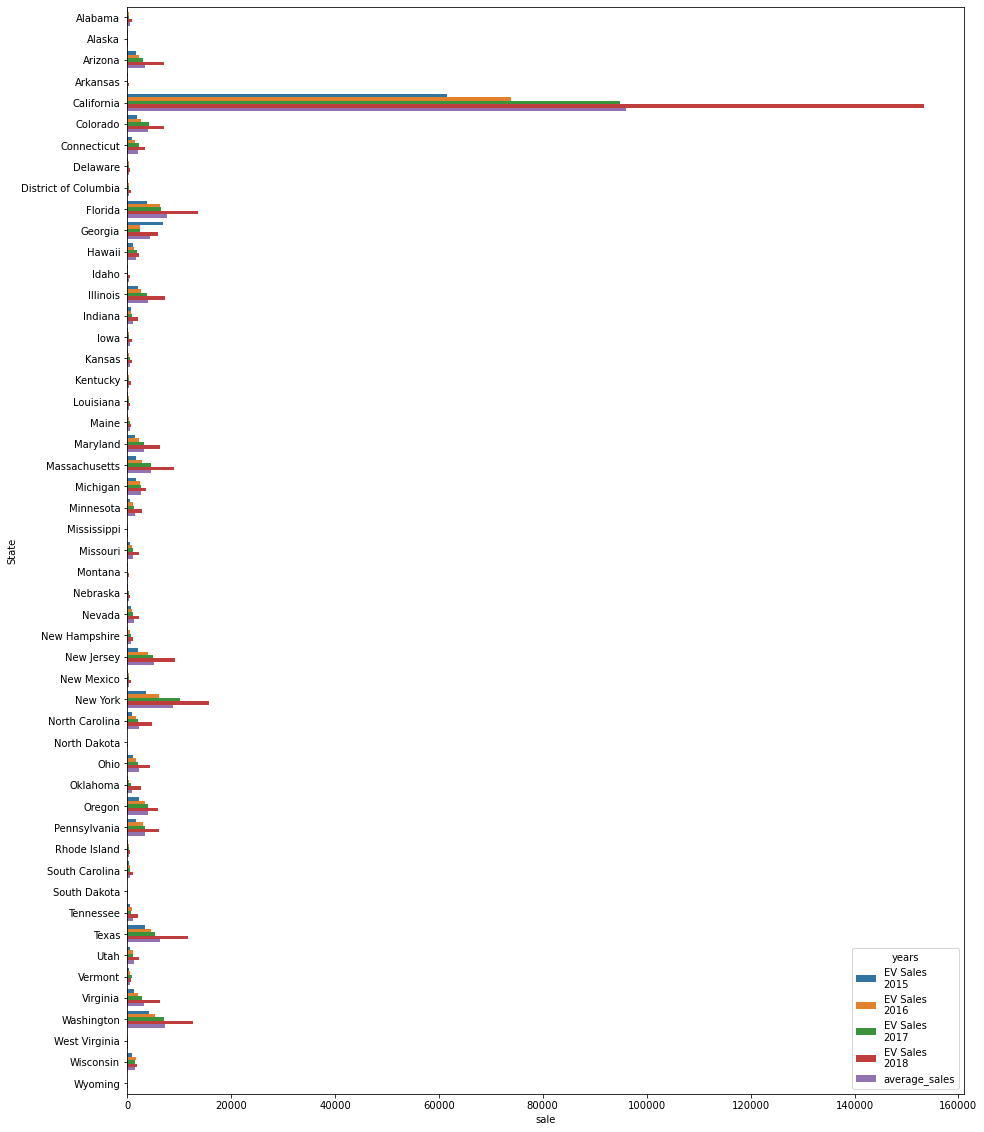

In [235]:
# Compute average sales and add to df
if 'average_sales' not in df:
    df.insert(5, 'average_sales', df.iloc[:,1:5].mean(axis=1).to_frame())
    df['average_sales'] = df['average_sales'].astype(int)
# Plot state sales data
sales_data = df.iloc[:,1:6]
sales_data['State'] = sales_data.index.get_level_values('State')
x=pd.melt(sales_data,id_vars="State", var_name="years", value_name="sale")
y=x.groupby(["State","years"]).sum()
y['State'] = y.index.get_level_values('State')
y['years'] = y.index.get_level_values('years')
plt.figure(figsize=(15,20))
sns.barplot(x='sale', y='State', hue="years",data=y)

# Linear regression

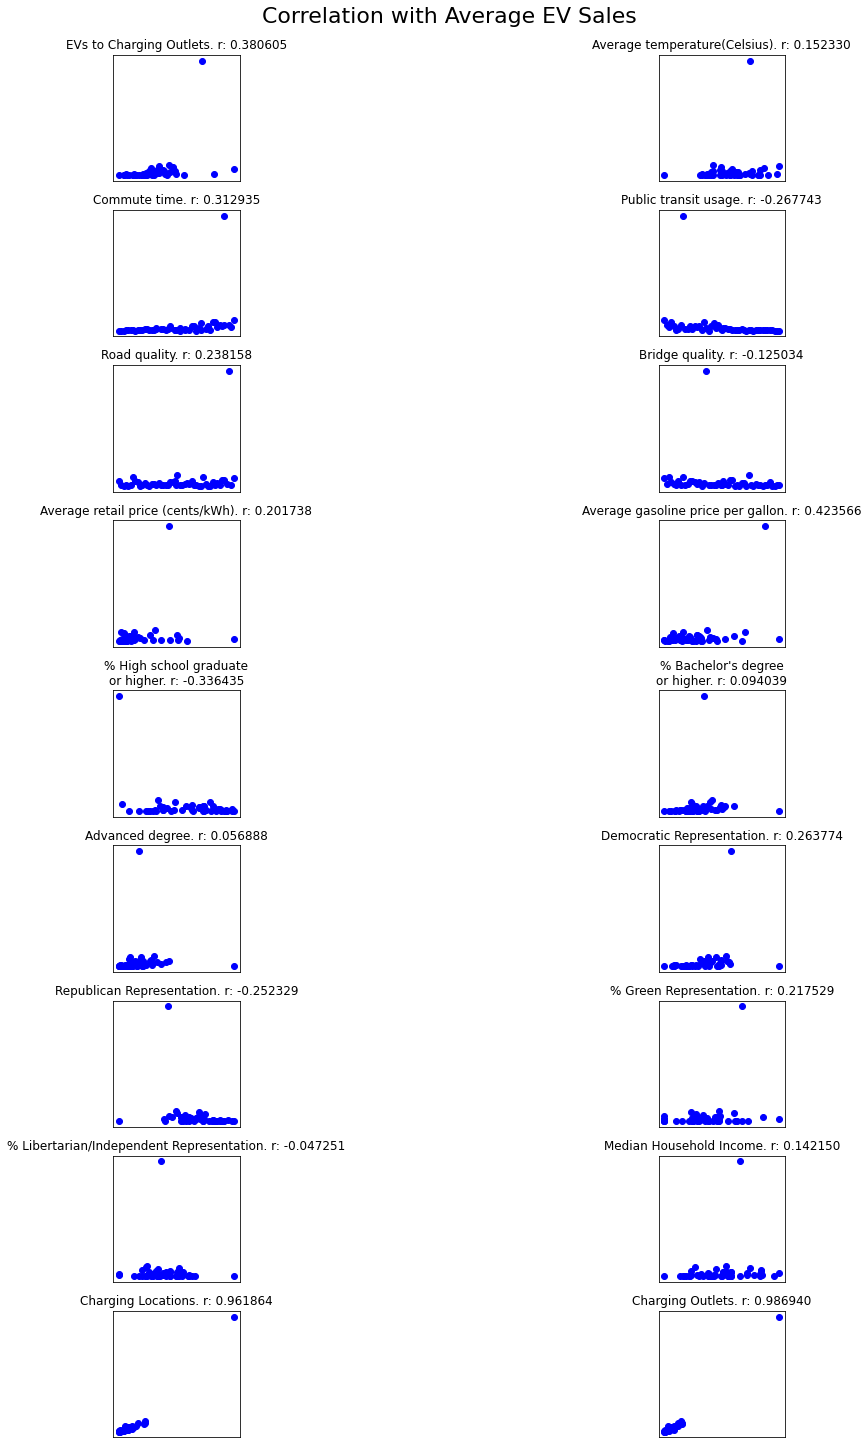

In [238]:
# Adjust columns names
df.rename(columns={"Avg/C": "Average temperature(Celsius)",
                   "Median Household Income\t $": "Median Household Income", 
                   "% Libertarian/ Independent Representation": "% Libertarian/Independent Representation",
                   "Avg gasoline price per gallon": "Average gasoline price per gallon",
                   "COMMUTE TIME": "Commute time",
                   "PUBLIC TRANSIT USAGE": "Public transit usage",
                   "ROAD QUALITY": "Road quality",
                   "BRIDGE QUALITY": "Bridge quality"
                   }, inplace=True)

# Correlation plot between average sales and continuous features
avg_sales = df['average_sales']
# avg_sales = df['Avg % of Total Sales 2015-2018']
# avg_sales.apply(lambda x : (x-avg_sales.mean())/avg_sales.std())
cont_features = ['Average temperature(Celsius)', 'Commute time','Public transit usage','Road quality','Bridge quality','Average retail price (cents/kWh)','Average gasoline price per gallon',
             '% High school graduate\nor higher',"% Bachelor's degree\nor higher",'Advanced degree','Democratic Representation','Republican Representation',
             '% Green Representation','% Libertarian/Independent Representation','Median Household Income','Charging Locations',
             'Charging Outlets','Outlets Per Location','EVs to Charging Outlets']
cont_cols = df.loc[:,cont_features]
cont_cols.columns = cont_features
fig, axs = plt.subplots(9, 2,figsize=(15,20),constrained_layout=True)
fig.suptitle("Correlation with Average EV Sales",fontsize=22)
# fig.suptitle("Correlation with Average EV market share",fontsize=22)
for i in range(18):
    r = i//2
    c = i%2
    # get feature, normalize and plot
    col = cont_cols.iloc[:,i-1].astype(float)
    col=col.apply(lambda x : (x-col.mean())/col.std())
    axs[r, c].plot(col.iloc[:], avg_sales.iloc[:], 'bo')
    # set plot title, showing correlation value
    corr = avg_sales.corr(col)
    axs[r, c].set_title("{}. r: {:2f}".format(col.name,corr))
    # format plot
    axs[r, c].xaxis.set_visible(False)
    axs[r, c].yaxis.set_visible(False)
    x0,x1 = axs[r, c].get_xlim()
    y0,y1 = axs[r, c].get_ylim()
    axs[r, c].set_aspect(abs(x1-x0)/abs(y1-y0))

Commute time, public transit usage, charging locations, charing outlets, democratic representation has |correlation score| > 0.5.  
--> Use for linear regression

Linear Regression score: 0.8940991176845242
Weights:
Commute time: 0.0026983513452960655
Public transit usage: -0.0062208891647492414
Charging Locations: 0.04916778973601992
Charging Outlets: -0.01660344166449759
Democratic Representation: -0.0017167132249041562
Bias: 0.0034007887604487422

Test set performance
                true_labels  prediction
State                                  
New Hampshire        0.0032    0.001193
Hawaii               0.0087    0.004697
Georgia              0.0271    0.007131
Michigan             0.0142    0.002788
Arizona              0.0169    0.004713
Nevada               0.0063    0.003872
Vermont              0.0033   -0.001124
New York             0.0436    0.013452
Montana              0.0008   -0.002820
California           0.5059    0.035606
North Carolina       0.0113    0.004810
Test score: -0.004185489727969838
Mean squared error: 0.020260307680574758

Predict 2018 Sales
Prediction score: 0.09293571893264718
Mean squared error: 0.003766234141

Text(0.5, 0.98, '2018 prediction performance')

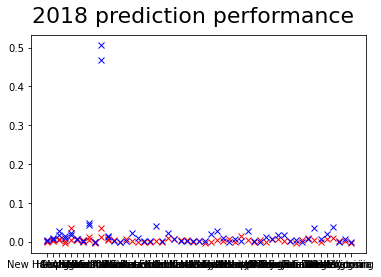

In [240]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import statistics as stats
# To try using ev_market_share or avg_sale/population as labels, uncomment the line below
# Y = df["average_sales"]
# Y_2018 = df["EV Sales\n2018"]
Y = df['Avg % of Total Sales 2015-2018']
Y_2018 = df["EV Sales\n2018 % of Total"]
# Y = df["average_sales"]/df["Population"]
X = df.loc[:,['Commute time','Public transit usage','Charging Locations', 'Charging Outlets', 'Democratic Representation']]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
# scale data
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(x_train)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Fit data and print coefficients
lrModel = LinearRegression()
x = X_scaled
y = y_train
lrModel.fit(x,y)
print("Linear Regression score: " + str(lrModel.score(x,y)))
print("Weights:")
for i in range(len(X.columns)):
    print("{}: {}".format(X.columns[i], lrModel.coef_[i]))
print("Bias: " + str(lrModel.intercept_))

x_test_scaled = min_max_scaler.fit_transform(x_test)
pred = lrModel.predict(x_test_scaled)
result = pd.DataFrame({ 'true_labels': y_test, 'prediction': pred }) 
print("\nTest set performance")
print(result)
print("Test score: " + str(lrModel.score(x_test_scaled,y_test)))
print("Mean squared error: {}".format(stats.mean([(y_test[i]-pred[i])**2 for i in range(len(pred))])))
plt.plot(pred, 'rx', label='prediction')
plt.plot(y_test, 'bx', label='truth')
plt.suptitle("Test performance",fontsize=22)

print("\nPredict 2018 Sales")
X = df.loc[:,['Commute time','Public transit usage','Charging Locations', 'Charging Outlets', 'Democratic Representation']]
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
pred = lrModel.predict(X_scaled)
# result = pd.DataFrame({ 'true_labels': Y_2018, 'prediction': pred }) 
# print(result)
print("Prediction score: " + str(lrModel.score(X_scaled,Y_2018)))
print("Mean squared error: {}".format(stats.mean([(Y_2018[i]-pred[i])**2 for i in range(len(pred))])))
plt.plot(pred, 'rx', label='prediction')
plt.plot(Y_2018, 'bx', label='truth')
plt.suptitle("2018 prediction performance",fontsize=22)

# Decision Tree

In [226]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from IPython.display import Image, display
tree_reg_2 = DecisionTreeRegressor(max_depth=2)
tree_reg_2.fit(x_train,y_train)
export_graphviz( tree_reg_2,
out_file="ev_tree_max_depth_2.dot", feature_names=list(x.columns))

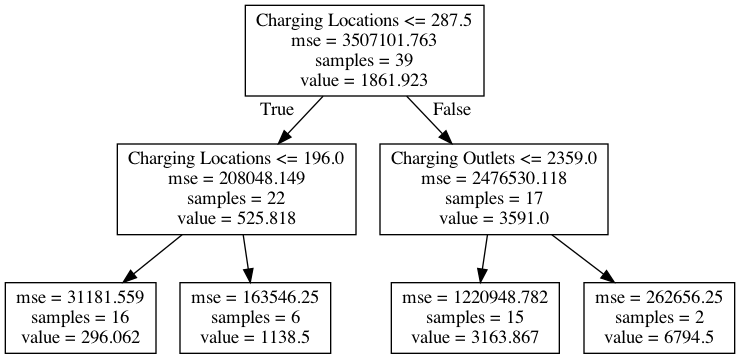

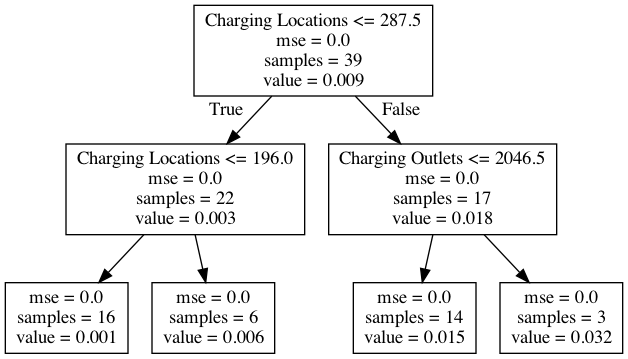


Test set performance
              true_labels  prediction
State                                
New Mexico         0.0018    0.001456
Colorado           0.0197    0.015307
Nevada             0.0063    0.006000
New York           0.0436    0.032000
North Dakota       0.0002    0.001456
Rhode Island       0.0019    0.001456
Oklahoma           0.0039    0.001456
Tennessee          0.0051    0.015307
Florida            0.0384    0.032000
Idaho              0.0014    0.001456
Mean squared error: 3.069612794961734e-05


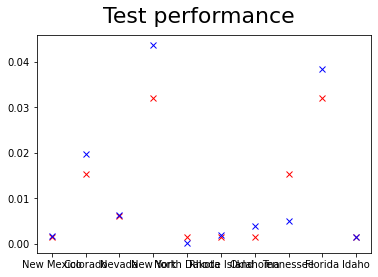

In [227]:
display(Image(filename='ev_tree_2_avg_sales.png'))
display(Image(filename='ev_tree_2_market_share.png'))
print("\nTest set performance")
pred = tree_reg_2.predict(x_test)
result = pd.DataFrame({ 'true_labels': y_test, 'prediction': pred })
print(result)
plt.plot(pred, 'rx', label='prediction')
plt.plot(y_test, 'bx', label='truth')
plt.suptitle("Test performance",fontsize=22)
print("Mean squared error: {}".format(stats.mean([(y_test[i]-pred[i])**2 for i in range(len(pred))])))

In [228]:
tree_reg_3 = DecisionTreeRegressor(max_depth=3)
tree_reg_3.fit(x_train, y_train)
export_graphviz( tree_reg_3,
out_file="ev_tree_max_depth_3.dot", feature_names=list(x.columns))

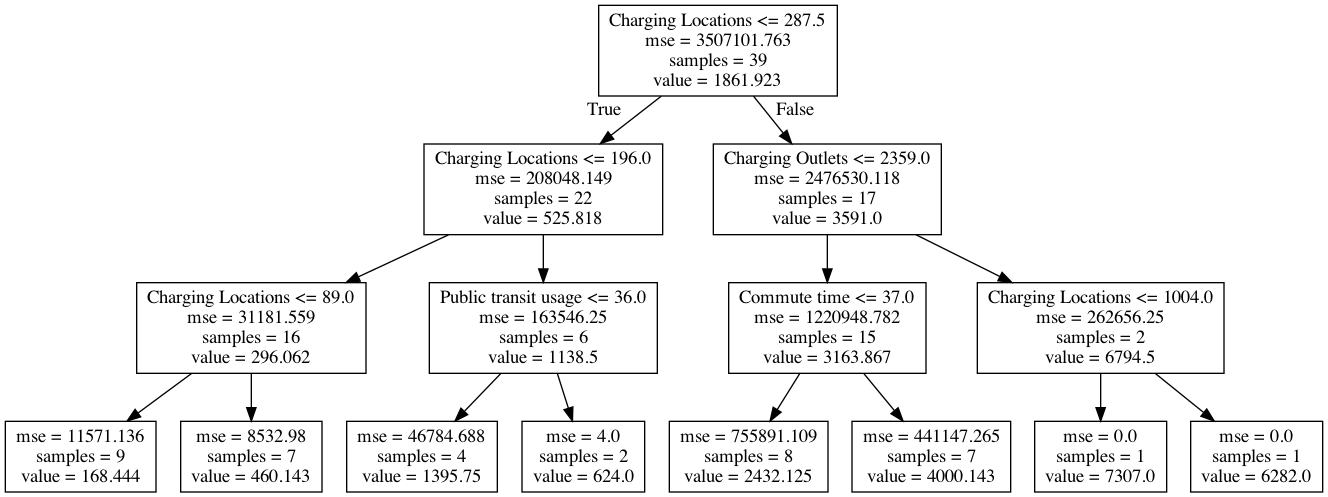

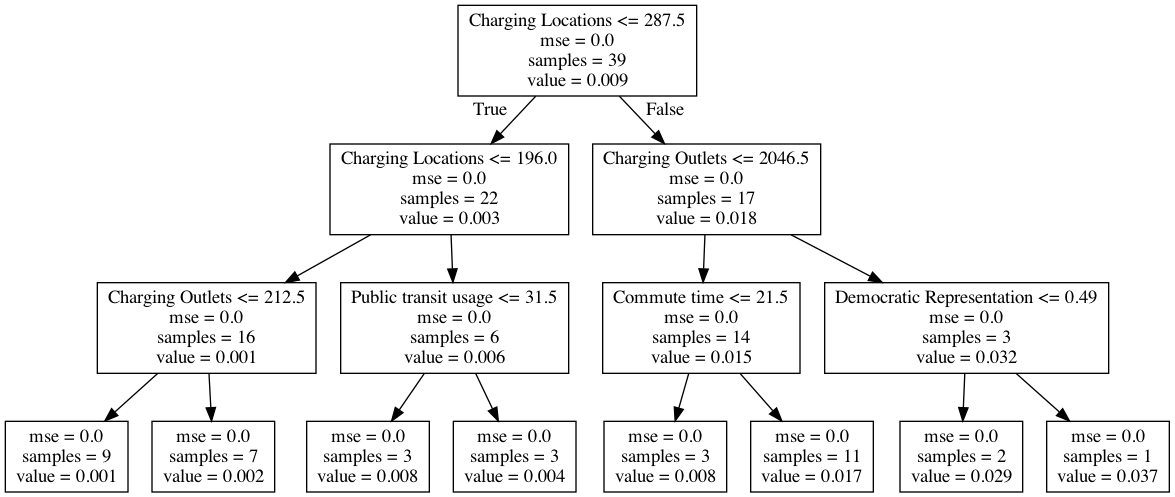


Test set performance
              true_labels  prediction
State                                
New Mexico         0.0018    0.000833
Colorado           0.0197    0.017245
Nevada             0.0063    0.008033
New York           0.0436    0.037400
North Dakota       0.0002    0.000833
Rhode Island       0.0019    0.002257
Oklahoma           0.0039    0.000833
Tennessee          0.0051    0.017245
Florida            0.0384    0.029300
Idaho              0.0014    0.000833
Mean squared error: 2.8897996608009586e-05


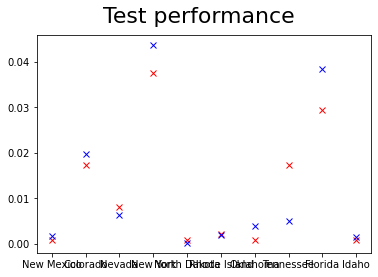

In [229]:
display(Image(filename='ev_tree_3_avg_sales.png'))
display(Image(filename='ev_tree_3_market_share.png'))
print("\nTest set performance")
pred = tree_reg_3.predict(x_test)
result = pd.DataFrame({ 'true_labels': y_test, 'prediction': pred })
print(result)
plt.plot(pred, 'rx', label='prediction')
plt.plot(y_test, 'bx', label='truth')
plt.suptitle("Test performance",fontsize=22)
print("Mean squared error: {}".format(stats.mean([(y_test[i]-pred[i])**2 for i in range(len(pred))])))

# Random forest 

In [230]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
dx = pd.read_csv('ECE 143.csv')
dx=dx.drop(index=[4, 8])
dx['average_sales'] = dx.iloc[:,0:4].mean(axis=1).to_frame()
dx['average_sales']=dx['average_sales'].astype(int)
# dx=dx.iloc[:,[4,13,14,15,16,17]]
dx=dx.iloc[:,[34,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]]
dx.columns = ['average_sales', 'Avg/C', 'COMMUTE TIME','PUBLIC TRANSIT USAGE','ROAD QUALITY','BRIDGE QUALITY','Average retail price','Avg gasoline price per gallon',
             'High school graduate or higher','Bachelors degree or higher','Advanced degree','Democratic Representation','Republican Representation',
             'Green Representation','Libertarian/ Independent Representation','Median Household Income','Tax Credit Program','Charging Locations',
             'Charging Outlets','Outlets Per Location','EV Stock','EVs to Charging Outlets']


x, y = dx.iloc[:, 1:].values, dx.iloc[:, 0].values
# x, y = dx.iloc[:, 1:].values, Y.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
np.nan_to_num(x_train)
np.nan_to_num(x_test)
np.nan_to_num(y_train)
np.nan_to_num(y_test)
feat_labels = dx.columns[1:]

forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
forest.fit(x_train, y_train)

ValueError: Unknown label type: 'continuous'

In [ ]:

dx.head()


In [ ]:
importances = forest.feature_importances_
print("importance：", importances)

x_columns = dx.columns[1:]
indices = np.argsort(importances)[::-1]
x_columns_indices = []
for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
    x_columns_indices.append(feat_labels[indices[f]])
plt.figure(figsize=(10, 6))
plt.title("Importance of all features", fontsize=18)
plt.ylabel("Importance level", fontsize=15, rotation=90)
plt.rcParams['font.sans-serif'] = ["SimHei"]
plt.rcParams['axes.unicode_minus'] = False
for i in range(x_columns.shape[0]):
    plt.bar(i, importances[indices[i]], color='orange', align='center')
    plt.xticks(np.arange(x_columns.shape[0]), x_columns_indices, rotation=90, fontsize=15)
plt.show()